#**Actividad: Regresión Lineal 2**

Alejandro Pizarro | A0163784

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import t, f
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estadística/Actividades en clase/datasets/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###1. Base de datos completa

In [36]:
# Verificamos si nuestra base de datos esta completa
print("Cantidad de valores faltantes:", df.isna().sum().sum())

Cantidad de valores faltantes: 0


In [37]:
df.drop(['id', 'diagnosis'], axis=1, inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###2. Mostrar que las variables regresoras son independientes.

In [38]:
# Verificamos la correlacion entre las variables
correlacion  = df.corr()
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [39]:
# Estandarizamos los datos
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)
df_estandar

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [40]:
# Creamos nuevo DataFrame con datos estandarizados
df = pd.DataFrame(df_estandar, columns=df.columns)

###3. Hipótesis nula de coeficientes de regresión y su estadístico de prueba, así como su distribución.

La hipótesis nula (H0) establece que la media corresponde a un determinado valor, digamos μ = 1, mientras que la hipótesis alternativa (H1) establece que la media poblacional difiere de este valor (μ ≠ 1). En tales situaciones, se utilizan comúnmente la prueba t de Student o la prueba Z. Sin embargo, es necesario calcular el valor crítico. Con un nivel de confianza del 95%, el valor crítico de Z (dos colas) es de aproximadamente ±2.085. Este valor se deriva de una distribución normal estándar y cubre el 95% del área bajo la curva.


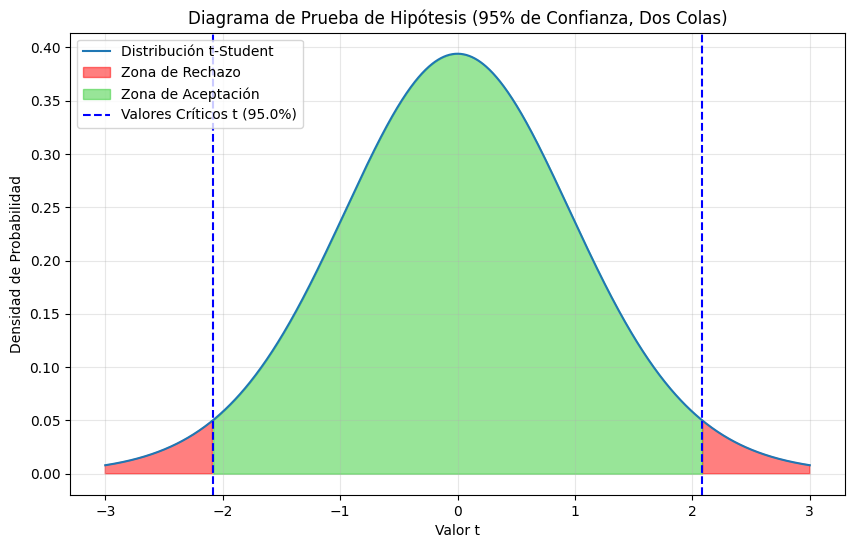

In [41]:
# Nivel de confianza (porcentaje)
confianza = 0.95

# Grados de libertad
grados_libertad = 20

# Valor crítico t para el nivel de confianza dado y los grados de libertad
alpha = 1 - confianza
valor_critico = t.ppf(1 - alpha / 2, df=grados_libertad)

# Rango de valores t
x = np.linspace(-3, 3, 1000)
y = t.pdf(x, df=grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución t-Student')

# Zona de rechazo (dos colas)
plt.fill_between(x, 0, y, where=(x >= valor_critico) | (x <= -valor_critico), color='red', alpha=0.5, label='Zona de Rechazo')
plt.fill_between(x, 0, y, where=(x > -valor_critico) & (x < valor_critico), color='limegreen', alpha=0.5, label='Zona de Aceptación')

# Marcar los valores críticos t
plt.axvline(x=valor_critico, color='blue', linestyle='--', label=f'Valores Críticos t ({confianza*100}%)')
plt.axvline(x=-valor_critico, color='blue', linestyle='--')

plt.legend(loc='upper left')
plt.title('Diagrama de Prueba de Hipótesis (95% de Confianza, Dos Colas)')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True, alpha=0.3)
plt.show()

###4. Hipótesis nula de la significancia del modelo (prueba F-Fisher)

El estadístico de prueba en una prueba F sigue una distribución F de Fisher con dos conjuntos de grados de libertad: el numerador y el denominador. El numerador generalmente representa el número de restricciones aplicadas por el modelo nulo, mientras que el denominador corresponde al número de observaciones menos los parámetros estimados en el modelo completo. Cuando trabajamos con un nivel de confianza del 95%, empleamos un valor crítico de F que se encuentra en el percentil 0.05 de la distribución F. Esto implica que el 95% del área bajo la curva de la distribución F se ubica en la región de aceptación, mientras que el 5% restante se encuentra en la región de rechazo.

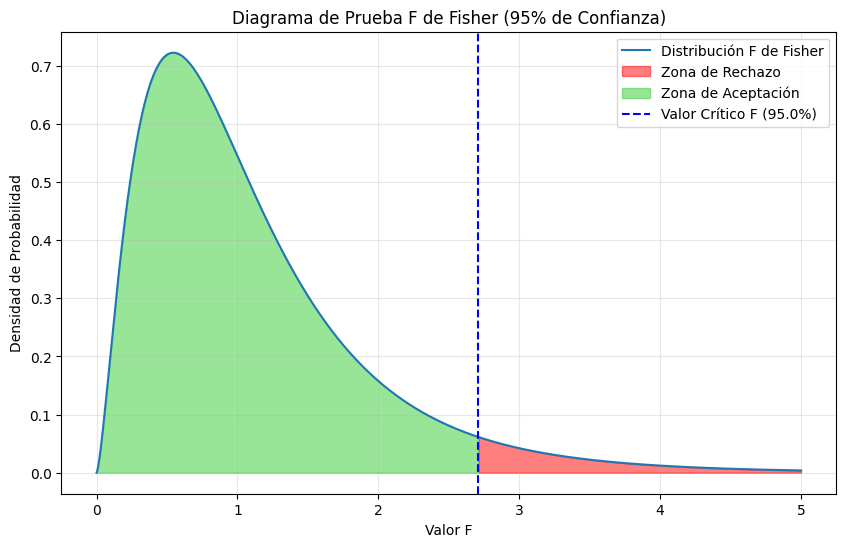

In [42]:
# Para un 95% de confianza
confianza = 0.95

# Grados de libertad del numerador y denominador
grados_libertad_numerador = 5
grados_libertad_denominador = 20

# Valor crítico F para el nivel de confianza dado y los grados de libertad
valor_critico = f.ppf(confianza, dfn=grados_libertad_numerador, dfd=grados_libertad_denominador)

# Creamos una distribución F de Fisher
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn=grados_libertad_numerador, dfd=grados_libertad_denominador)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución F de Fisher')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.5, label='Zona de Rechazo')
plt.fill_between(x, 0, y, where=(x < valor_critico), color='limegreen', alpha=0.5, label='Zona de Aceptación')

# Marcar el valor crítico F
plt.axvline(x=valor_critico, color='blue', linestyle='--', label=f'Valor Crítico F ({confianza*100}%)')

plt.title('Diagrama de Prueba F de Fisher (95% de Confianza)')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

###5. Realiza un modelo de regresión hacia atrás (backward)

In [44]:
# Creamos el modelo
entrenamiento, prueba = train_test_split(df, test_size=0.20, random_state=42)
# entrenamiento.columns

# Renombramos variables
df.rename(columns ={'concave points_mean':'concave_points_mean'}, inplace=True)
df.rename(columns ={'concave points_se':'concave_points_se'}, inplace=True)
df.rename(columns ={'concave points_worst':'concave_points_worst'}, inplace=True)

modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.987e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:14   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2429.
Df Residuals:                     425   BIC:                            -2306.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [45]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.210e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:20   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     426   BIC:                            -2312.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [46]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.453e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:20   Log-Likelihood:                 1244.4
No. Observations:                 455   AIC:                            -2433.
Df Residuals:                     427   BIC:                            -2318.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [47]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.702e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:20   Log-Likelihood:                 1244.0
No. Observations:                 455   AIC:                            -2434.
Df Residuals:                     428   BIC:                            -2323.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [48]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.982e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:20   Log-Likelihood:                 1243.8
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     429   BIC:                            -2328.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [49]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.266e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:20   Log-Likelihood:                 1243.1
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     430   BIC:                            -2333.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [50]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.589e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1242.7
No. Observations:                 455   AIC:                            -2437.
Df Residuals:                     431   BIC:                            -2339.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [51]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.943e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1242.5
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     432   BIC:                            -2344.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [52]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.310e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1241.6
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     433   BIC:                            -2349.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [53]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.693e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1240.3
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     434   BIC:                            -2352.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [54]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.118e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1238.9
No. Observations:                 455   AIC:                            -2438.
Df Residuals:                     435   BIC:                            -2355.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [55]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.640e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:13:21   Log-Likelihood:                 1238.8
No. Observations:                 455   AIC:                            -2440.
Df Residuals:                     436   BIC:                            -2361.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Obtenemos un p-valor menor a 0.05 para todas las variables, lo que indica que cada una de ellas es estadísticamente significativa. Esto significa que existe evidencia suficiente para afirmar que estas variables tienen un impacto en la variable dependiente.

In [56]:
# Encontramos la aproximacion en 'y'
y_aprox = 0 + 0.9462*prueba['perimeter_mean'] +  0.0740*prueba['area_mean'] + 0.0075*prueba['smoothness_mean'] - 0.0594*prueba ['compactness_mean'] -0.0348*prueba['concavity_mean'] + 0.0034*prueba['symmetry_mean']+ 0.0073*prueba['fractal_dimension_mean']-0.0116*prueba['perimeter_se'] +0.0117*prueba['concavity_se'] +0.0038*prueba['symmetry_se'] + 0.2351*prueba['radius_worst'] - 0.1218*prueba['perimeter_worst'] - 0.0819*prueba['area_worst'] - 0.0046*prueba['smoothness_worst'] + 0.0152*prueba['compactness_worst'] + 0.0056*prueba['concave_points_worst'] - 0.0041*prueba['symmetry_worst'] - 0.0061*prueba['fractal_dimension_worst']

In [57]:
tabla = pd.DataFrame({'Real':prueba['radius_mean'], 'Prediccion':y_aprox, 'Errores':prueba['radius_mean']-y_aprox})

Text(0, 0.5, 'Prediccion')

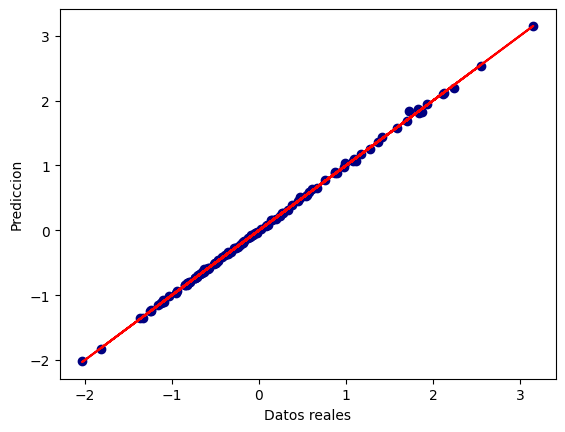

In [58]:
plt.scatter(prueba['radius_mean'],y_aprox,color='navy')
plt.plot(prueba['radius_mean'],prueba['radius_mean'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

Text(0, 0.5, 'Valor del residuo')

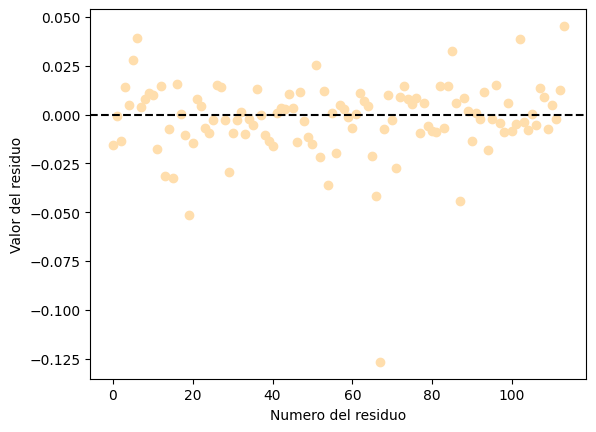

In [59]:
residuos=len(tabla['Errores'])
plt.scatter(range(residuos),tabla['Errores'],color='navajowhite')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Text(0, 0.5, 'Frecuencia (proba)')

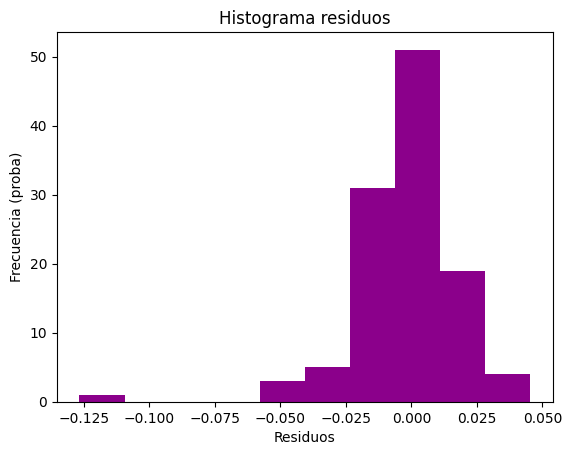

In [60]:
plt.hist(x=tabla['Errores'], color='darkmagenta')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

In [61]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores']-media)/std

# Prueba de Kolmogórov-Smirnov
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.13231787971019285, pvalue=0.03353673931936964, statistic_location=-0.4286959184305832, statistic_sign=-1)

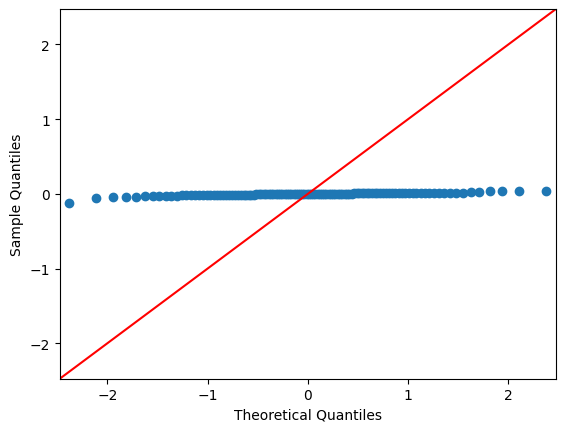

In [62]:
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')

Tras llevar a cabo el análisis de gráficas y pruebas previamente presentadas, podemos llegar a la conclusión de que el modelo funciona de manera excepcional. La discrepancia entre los valores predichos y los valores reales es mínima, lo que se refleja en errores muy reducidos. Los gráficos demuestran que el modelo se ajusta prácticamente de manera perfecta a los datos reales, logrando así una excelente correspondencia con los mismos.